# Download data

This notebook is for download granular data from Brazil, which is amazingly organized and available here
https://data.brasil.io/dataset/covid19/_meta/list.html
by BRASIL.IO people (thank you!).

In [2]:
import subprocess
import gzip
import pandas as pd
import os

In [3]:
url = 'https://data.brasil.io/dataset/covid19/caso_full.csv.gz'
file = 'caso_full.csv.gz'
path = '/home/babreu/Science/covid19/repo'
os.chdir(path)
subprocess.run(['wget', '-c','-P', path, url])

CompletedProcess(args=['wget', '-c', '-P', '/home/babreu/Science/covid19/repo', 'https://data.brasil.io/dataset/covid19/caso_full.csv.gz'], returncode=0)

In [4]:
with gzip.open(file) as f:
    df = pd.read_csv(f)

In [5]:
# check state-wise distribution
df2 = df[df.is_last == True]
df2.groupby(['state']).sum()

,city_ibge_code,estimated_population_2019,is_repeated,is_last,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,new_confirmed,new_deaths
state,,,,,,,,,,
AC,6001744.0,471106.0,0.0,5.0,77,120.72594,0.0333,2.0,5,0
AL,10822820.0,1164133.0,0.0,5.0,48,13.83402,0.0811,3.0,0,0
AM,26053899.0,3108077.0,0.0,21.0,1206,292.75057,3.3056,62.0,155,9
AP,4801404.0,651961.0,0.0,3.0,237,73.40737,0.0792,5.0,44,0
BA,209967679.0,7800589.0,0.0,73.0,674,619.48038,4.7676,21.0,33,0
CE,131506862.0,6313150.0,0.0,58.0,1748,385.14182,4.8592,76.0,81,2
DF,5300108.0,3015268.0,0.0,1.0,618,20.49569,0.0227,14.0,26,0
ES,86484005.0,3070804.0,0.0,28.0,430,227.10927,0.4449,14.0,47,5
GO,198044329.0,4489654.0,0.0,39.0,229,397.78365,2.7492,14.0,20,4


<IPython.core.display.Javascript object>


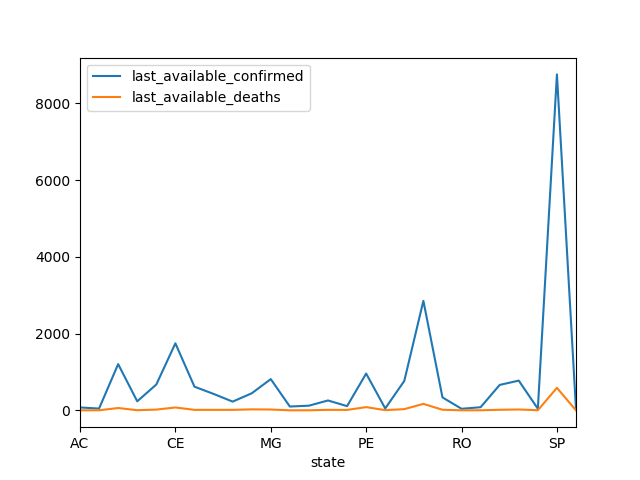

In [6]:
# plot it -- geographical maps on /basics/basics.ipynb
%matplotlib notebook
df2.groupby(['state']).sum()[['last_available_confirmed','last_available_deaths']].plot()

In [7]:
df2[df2.city.str.contains('Rio Preto')]

,city,city_ibge_code,date,estimated_population_2019,is_repeated,is_last,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,place_type,state,new_confirmed,new_deaths
11500,São Benedito do Rio Preto,2110401.0,2020-04-12,18663.0,False,True,1,5.35820,2020-04-12,NaN,0.0,city,MA,0,0
12231,São José do Rio Preto,3549805.0,2020-04-12,460671.0,False,True,44,9.55128,2020-04-12,0.0227,1.0,city,SP,4,0


# Geographical data


The Brazilian shapefile can be downloaded here: ftp://geoftp.ibge.gov.br/organizacao_do_territorio/estrutura_territorial/localidades/Shapefile_SHP/
or here (better): https://data.humdata.org/dataset/brazil-administrative-level-0-boundaries

A table with coordinates of cities is kindly available at this person's GitHub:
https://github.com/kelvins/Municipios-Brasileiros

In [8]:
import descartes                   
import geopandas as gpd           
from shapely.geometry import Point, Polygon

<IPython.core.display.Javascript object>


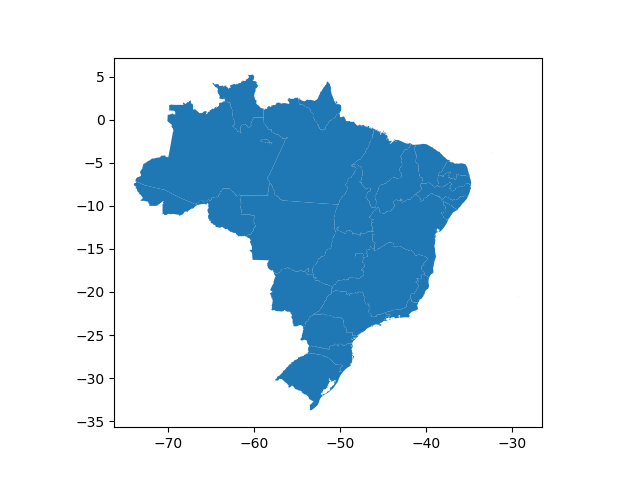

In [10]:
wmap = gpd.read_file('/home/babreu/Science/covid19/repo/Brazil_borders/bra_adm1/BRA_adm1.shp')
wmap.plot()

In [13]:
file = path + '/Municipios-Brasileiros/csv/municipios.csv'

In [14]:
coordf = pd.read_csv(file)

In [22]:
df2.dropna(inplace=True)

/home/babreu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
df2.city_ibge_code = df2.city_ibge_code.apply(int)

In [28]:
df2.index = df2.city_ibge_code

In [34]:
df2.index.name = 'IBGE_code'

In [33]:
coordf.index = coordf.codigo_ibge

In [35]:
coordf.index.name = 'IBGE_code'

In [37]:
coordf.sample(3)

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
IBGE_code,,,,,,
3152303,3152303,Porto Firme,-20.6642,-43.0834,0,31
2911808,2911808,Guaratinga,-16.5833,-39.7847,0,29
3168309,3168309,Taquaraçu de Minas,-19.6652,-43.6922,0,31


In [38]:
df2['Latitude'] = coordf.latitude

/home/babreu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
df2['Longitude'] = coordf.longitude

/home/babreu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
geometry = [Point(xy) for xy in zip(df2['Longitude'], df2['Latitude'])]    # geometry of frame

crs = {'init': 'epsg:4326'}     # this is the coordinates type
geo_df = gpd.GeoDataFrame(df2, crs = crs, geometry = geometry)   # data frame

geo_df.head()

,city,city_ibge_code,date,estimated_population_2019,is_repeated,is_last,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,place_type,state,new_confirmed,new_deaths,Latitude,Longitude,geometry
IBGE_code,,,,,,,,,,,,,,,,,,
2800308,Aracaju,2800308,2020-04-11,657013.0,False,True,35,5.32714,2020-04-11,0.1143,4.0,city,SE,2,0,-10.90910,-37.0677,POINT (-37.06770 -10.90910)
1200401,Rio Branco,1200401,2020-04-12,407319.0,False,True,60,14.73047,2020-04-12,0.0333,2.0,city,AC,3,0,-9.97499,-67.8243,POINT (-67.82430 -9.97499)
2704302,Maceió,2704302,2020-04-12,1018948.0,False,True,37,3.63120,2020-04-12,0.0811,3.0,city,AL,0,0,-9.66599,-35.7350,POINT (-35.73500 -9.66599)
1302504,Manacapuru,1302504,2020-04-12,97377.0,False,True,87,89.34348,2020-04-12,0.0345,3.0,city,AM,23,0,-3.29066,-60.6216,POINT (-60.62160 -3.29066)
1302603,Manaus,1302603,2020-04-12,2182763.0,False,True,1053,48.24161,2020-04-12,0.0484,51.0,city,AM,121,6,-3.11866,-60.0212,POINT (-60.02120 -3.11866)


In [47]:
geo_df.sort_values(by=['last_available_confirmed'],ascending=False,inplace=True)
max_cases = geo_df.iloc[0].last_available_confirmed
markersize = []
for code in list(geo_df.index):
    cases = geo_df.loc[code].last_available_confirmed
    if cases > 10:
        size = 400*cases / max_cases    # 400 is purely empirical
    elif cases >= 1:
        size = 1
    else:
        size = 0
    markersize.append(size)

<IPython.core.display.Javascript object>


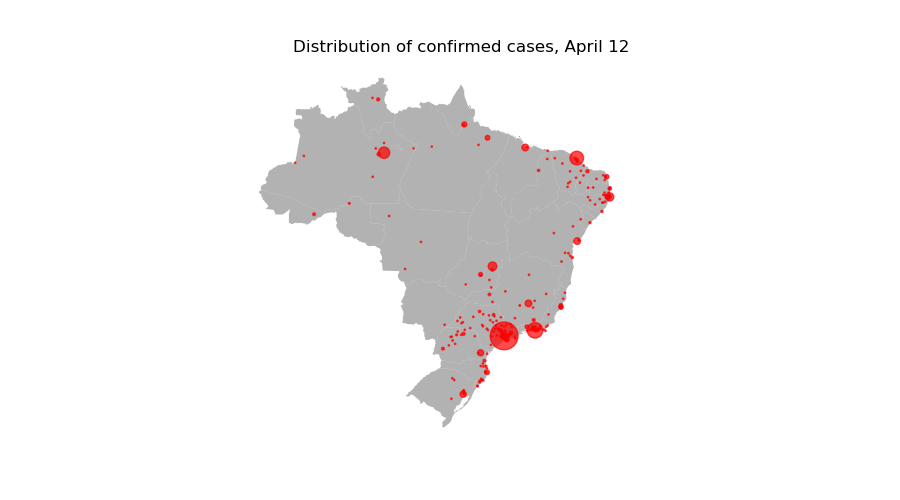

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,5))
wmap.plot(ax = ax, alpha=0.6, color='grey')
ax.axis('off')
ax.set_title('Distribution of confirmed cases, April 12')
geo_df.plot(ax=ax,markersize=markersize,edgecolor='red',color='red',alpha=0.7)

In [50]:
plt.savefig('/home/babreu/Science/brazil.jpg')